# Lab 5: Genetic Data Analysis with PCA, Clustering, and Regression-2

- Name: AbdelRahman Adel AbdelFattah
- ID: 17012296


## Objective




To provide students with hands-on experience in advanced genetic data analysis techniques, including data preprocessing, Principal Component Analysis (PCA), clustering, and regression analysis using PLINK and R.

## Prerequisites

- Understanding of basic genetics and R programming.
- Completion of a preliminary lecture on Genetic Data Analysis using PLINK.
- PLINK and R software installed, with necessary R packages.
- Familiarity with command-line interfaces and RStudio.

In [548]:
install.packages("ggplot2")
install.packages("scatterplot3d")
install.packages("gridExtra")
install.packages("factoextra")
install.packages("NbClust")
install.packages("dendextend")
install.packages("corrplot")
install.packages("nnet")

Installing package into '/opt/homebrew/lib/R/4.3/site-library'
(as 'lib' is unspecified)



In [549]:
library(ggplot2)
library(scatterplot3d)
library(gridExtra)
# library(factoextra)
library(NbClust)
library(dendextend)
library(corrplot)
library(nnet)

In [550]:
shell_call <- function(command, ...) {
    result <- system(command, intern = TRUE, ...)
    cat(paste0(result, collapse = "\n"))
}

## Part 1: Data Preprocessing and Quality Control with PLINK

This initial phase ensures students work with high-quality genetic data by filtering and pruning the dataset using PLINK.

### Task 1.1: Data Cleaning

Command: plink --file [filename] --maf 0.2 --geno 0.02 --hwe 10E-06 --make-bed --out [cleaned_data]

Coding Hints: Replace [filename] and [cleaned_data] with your input file and desired output file names, respectively. The command filters out variants below the minor allele frequency threshold, excludes samples with low genotyping rates, and removes SNPs not in Hardy-Weinberg equilibrium.

In [551]:
shell_call("chmod a+x plink")

In [552]:
shell_call("./plink --noweb --bfile Qatari156_filtered_pruned --maf 0.2 --geno 0.02 --hwe 10E-06 --make-bed --out cleaned_data")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to cleaned_data.log.
Options in effect:
  --bfile Qatari156_filtered_pruned
  --geno 0.02
  --hwe 10E-06
  --maf 0.2
  --make-bed
  --noweb
  --out cleaned_data

Note: --noweb has no effect since no web check is implemented yet.
8192 MB RAM detected; reserving 4096 MB for main workspace.
67735 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.998816.
0 variants removed due to missing genotype data (--geno).
--hwe: 0 variant

### Task 1.2: Linkage Disequilibrium Pruning

Command: plink --bfile [cleaned_data] --indep-pairwise 50 5 0.5 --out [pruned_data]

Coding Hints: This command will generate a list of SNPs pruned based on the specified window size, step, and R^2 threshold. Ensure to use the binary files generated from Task 1.1 as input.

In [553]:
shell_call("./plink --noweb --bfile cleaned_data --indep-pairwise 50 5 0.5 --make-bed --out pruned_data")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pruned_data.log.
Options in effect:
  --bfile cleaned_data
  --indep-pairwise 50 5 0.5
  --make-bed
  --noweb
  --out pruned_data

Note: --noweb has no effect since no web check is implemented yet.
8192 MB RAM detected; reserving 4096 MB for main workspace.
31694 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.998719.
31694 variants and 156 people pass filters and QC.
Note: No phenotypes present.
--make-bed to pruned_d

### Task 1.3: Re-application of Lab 4: Genetic Data Analysis with PCA, Clustering, and Regression-1

Apply the PCA and clustering steps from Lab 4 on the pruned dataset to observe differences. Coding Hints: Use the same R scripts from Lab 4, ensuring that file paths and dataset names are updated to the pruned dataset. Pay attention to any changes in the outputs and plots.

In [554]:
shell_call("./plink --noweb --bfile pruned_data --pca --out pca_results")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pca_results.log.
Options in effect:
  --bfile pruned_data
  --noweb
  --out pca_results
  --pca

Note: --noweb has no effect since no web check is implemented yet.
8192 MB RAM detected; reserving 4096 MB for main workspace.
31694 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using up to 8 threads (change this with --threads).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.998719.
31694 variants and 156 people pass filters and QC.
Note: No phenotypes present.
Excluding 903 variants on non-autosomes from relationship ma

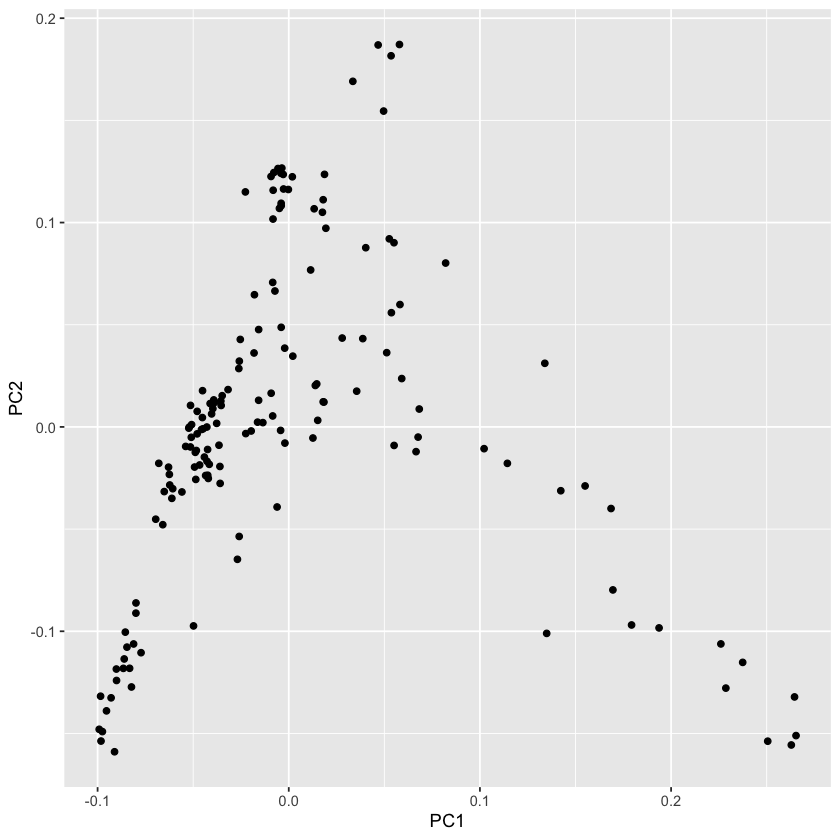

In [555]:
eigen_vecs <- read.table("pca_results.eigenvec", header = FALSE)
data <- data.frame(PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4)

ggplot(data, aes(x = PC1, y = PC2)) + geom_point() + labs(x = "PC1", y = "PC2")

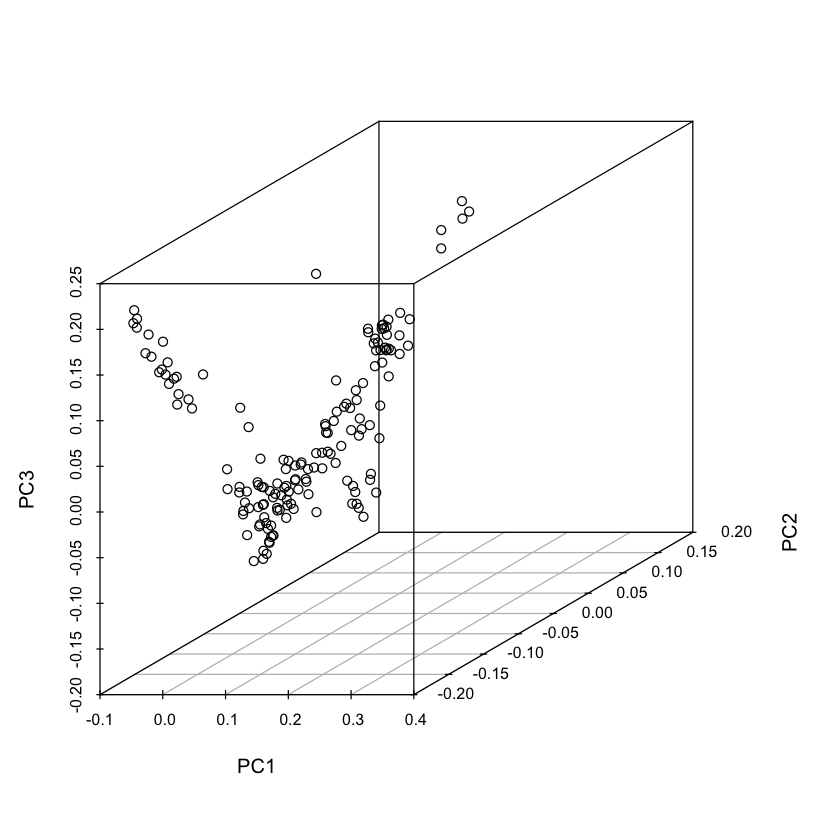

In [556]:
data <- data.frame(PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4, PC3 = eigen_vecs$V5)
scatterplot3d(data$PC1, data$PC2, data$PC3, xlab = "PC1", ylab = "PC2", zlab = "PC3")

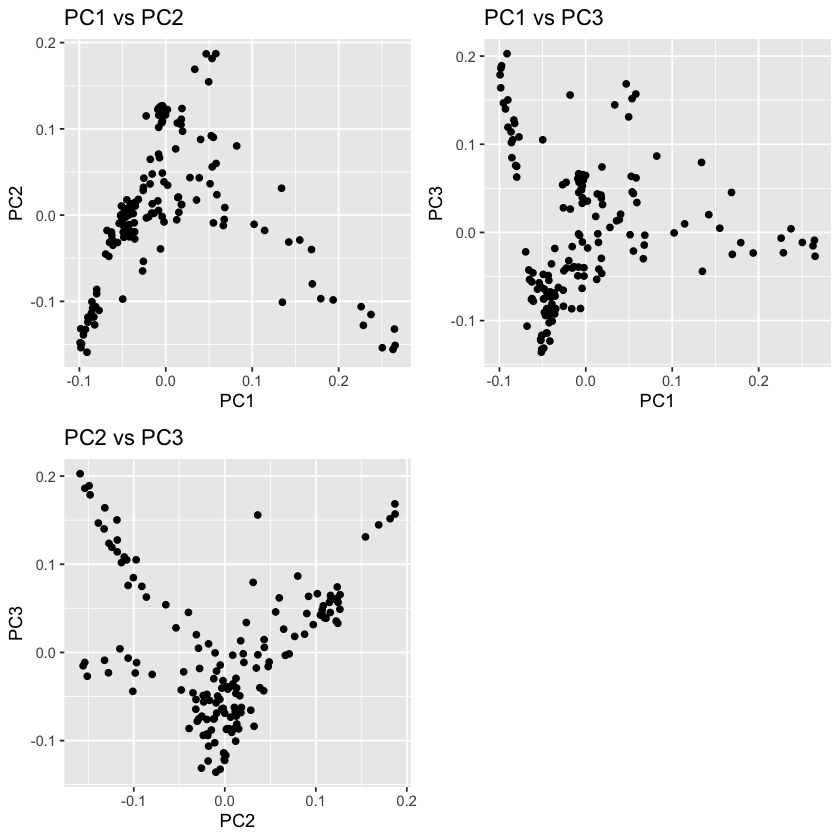

In [557]:
plot1 <- ggplot(data, aes(x = PC1, y = PC2)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")
plot2 <- ggplot(data, aes(x = PC1, y = PC3)) + geom_point() + labs(x = "PC1", y = "PC3") + ggtitle("PC1 vs PC3")
plot3 <- ggplot(data, aes(x = PC2, y = PC3)) + geom_point() + labs(x = "PC2", y = "PC3") + ggtitle("PC2 vs PC3")

grid.arrange(plot1, plot2, plot3, ncol = 2)

In [558]:
data <- read.table("pca_results.eigenvec", header = FALSE)
data <- data.frame(PC1 = data$V3, PC2 = data$V4, PC3 = data$V5)

In [559]:
methods_nbclust <- c("ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median", "centroid", "kmeans")

##### NbClust

[1] "ward.D"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


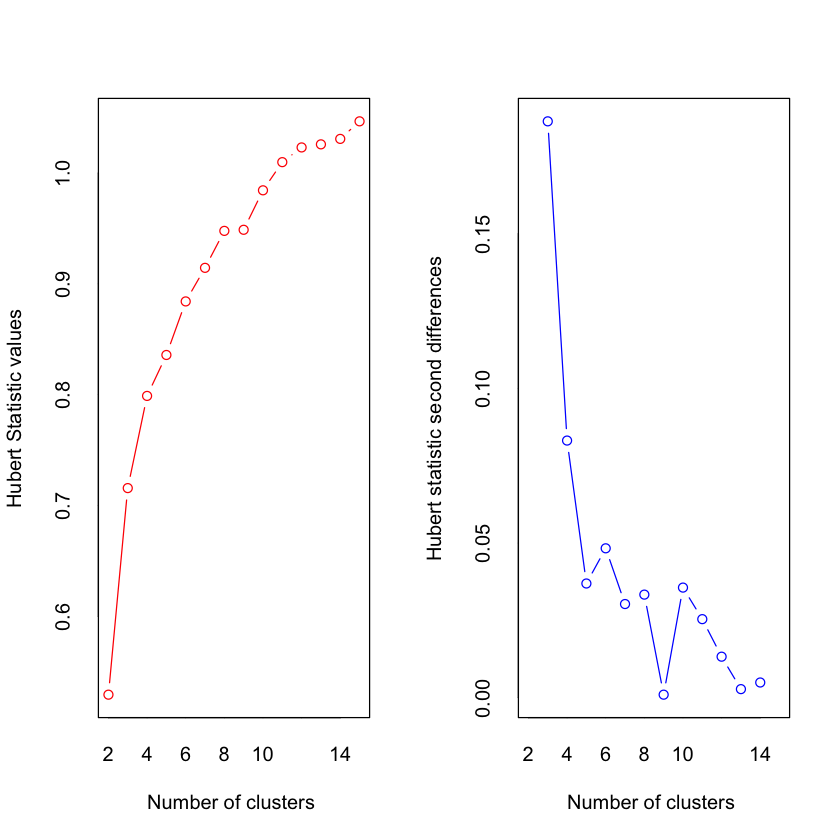

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 11 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 
[1]

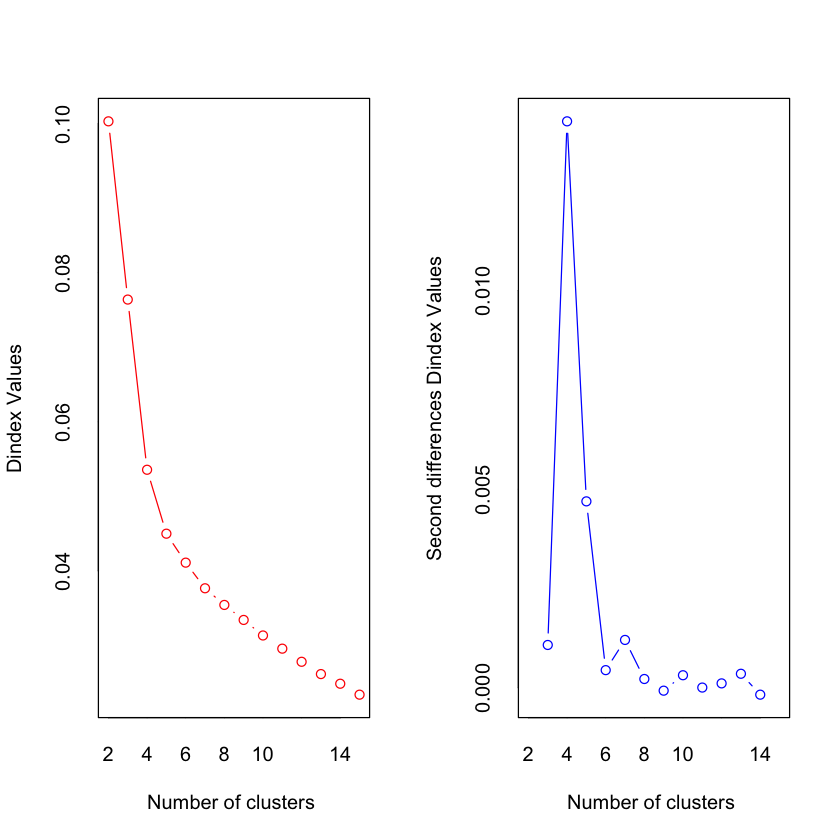

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


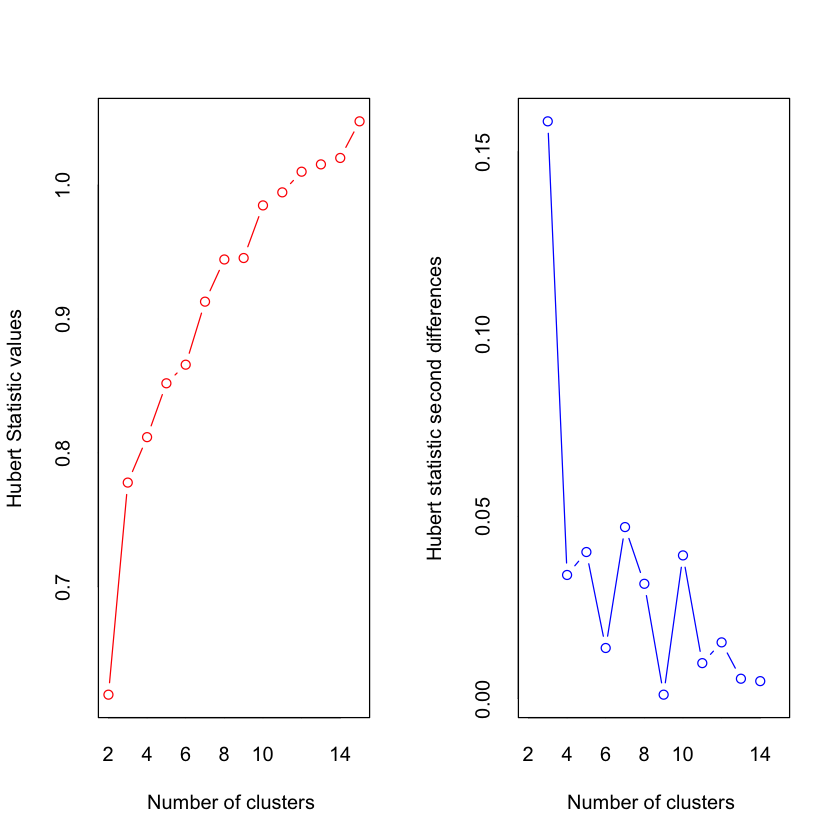

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 8 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 
[1] "end of method ======================="
[1] "sin

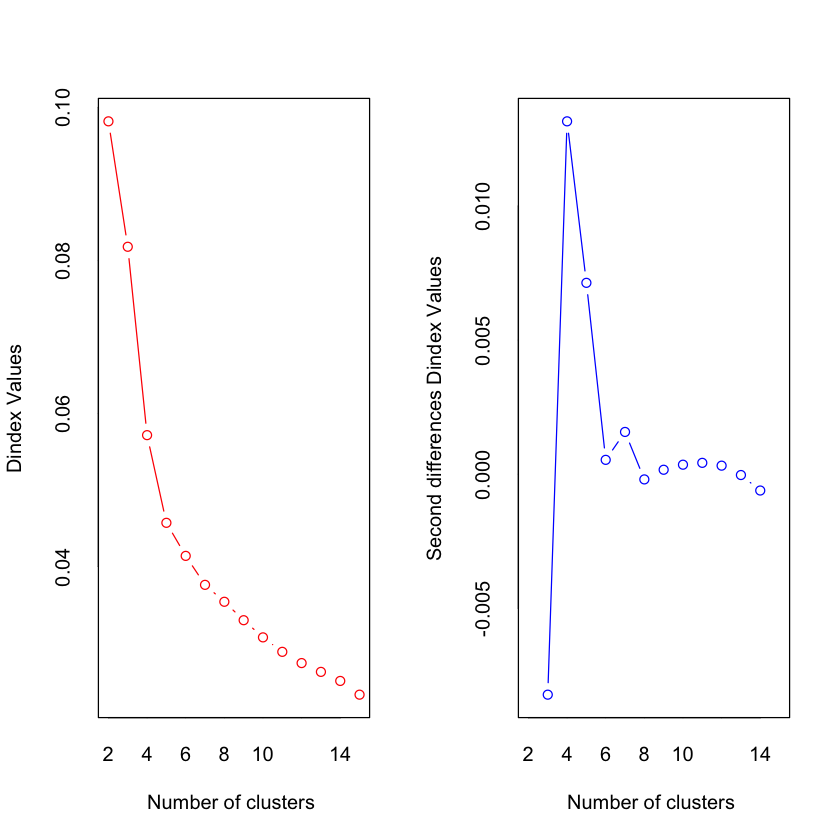

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


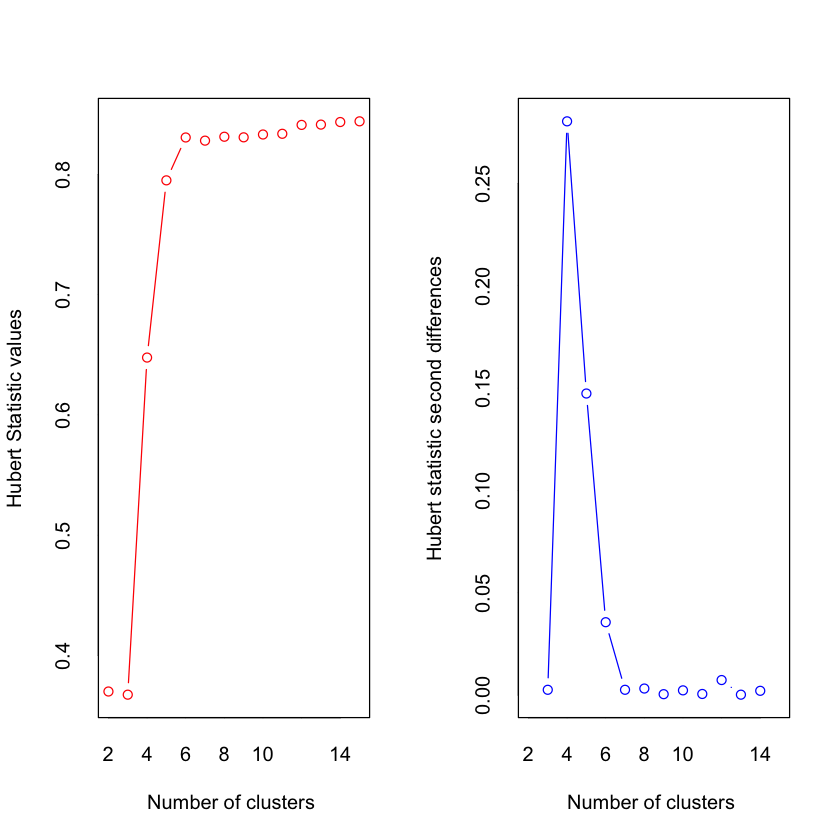

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 15 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  6 
 
 
******************************************************************* 
[1] "end of method ======================="
[1] "complete"


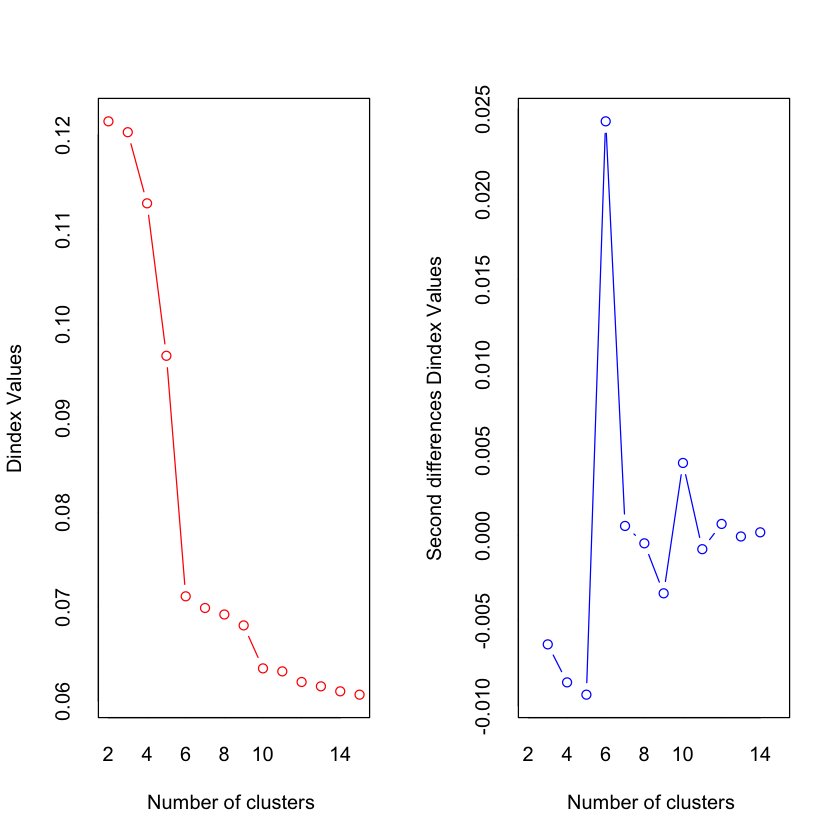

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


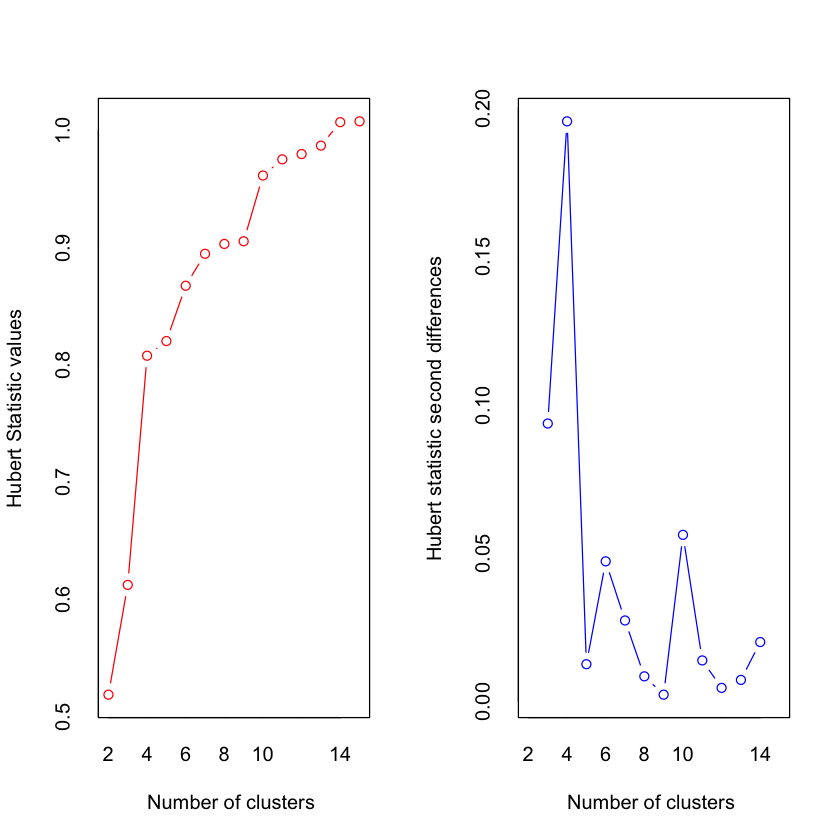

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 5 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 2 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
***************************

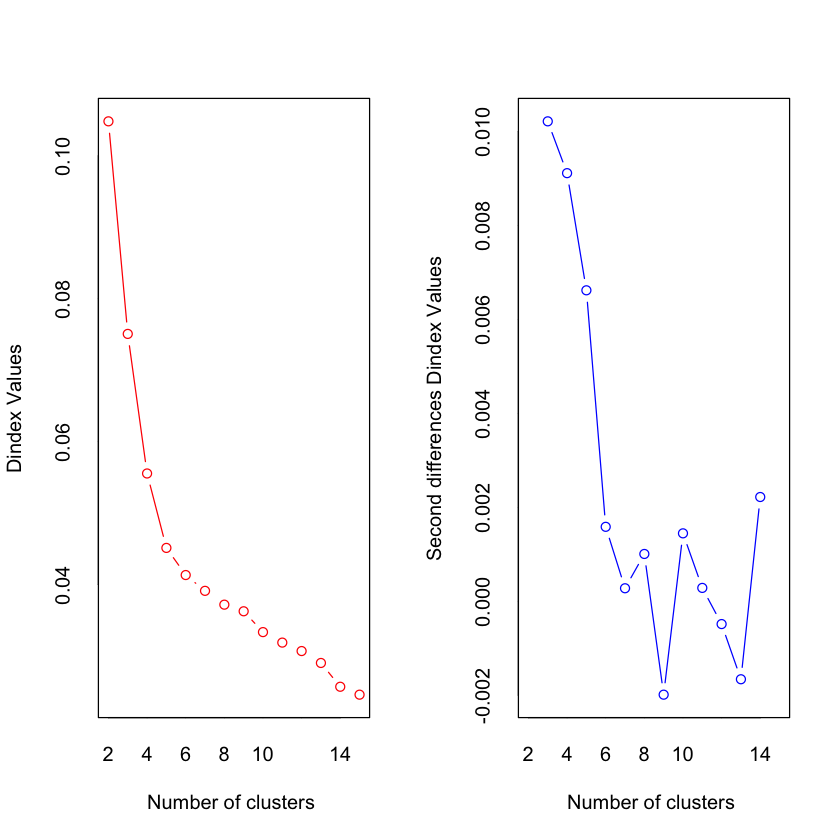

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


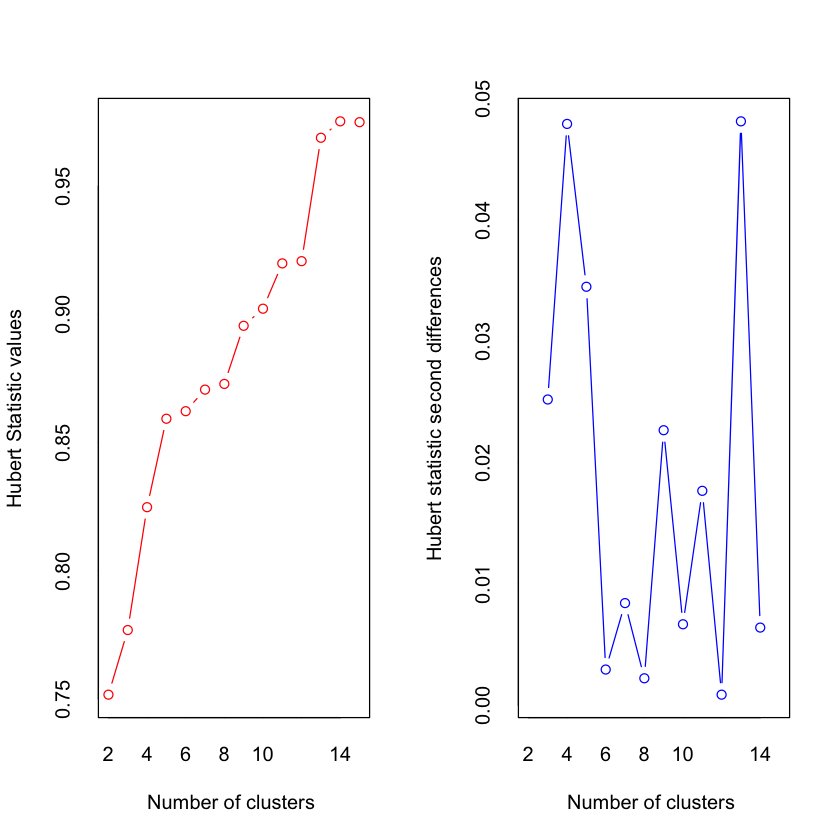

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 6 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 3 proposed 14 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
**************************

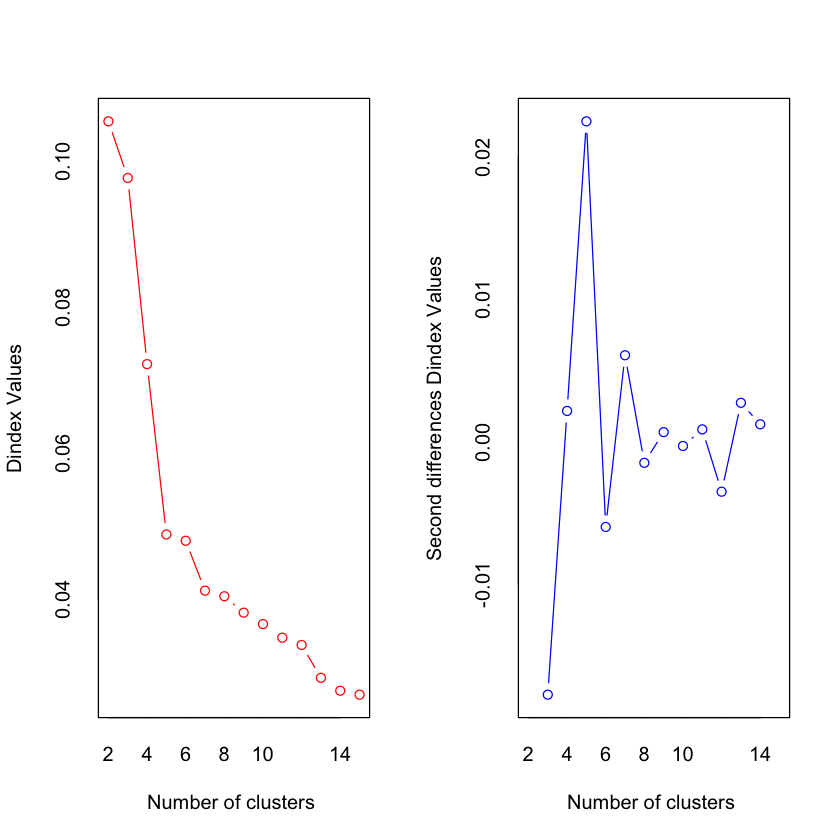

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


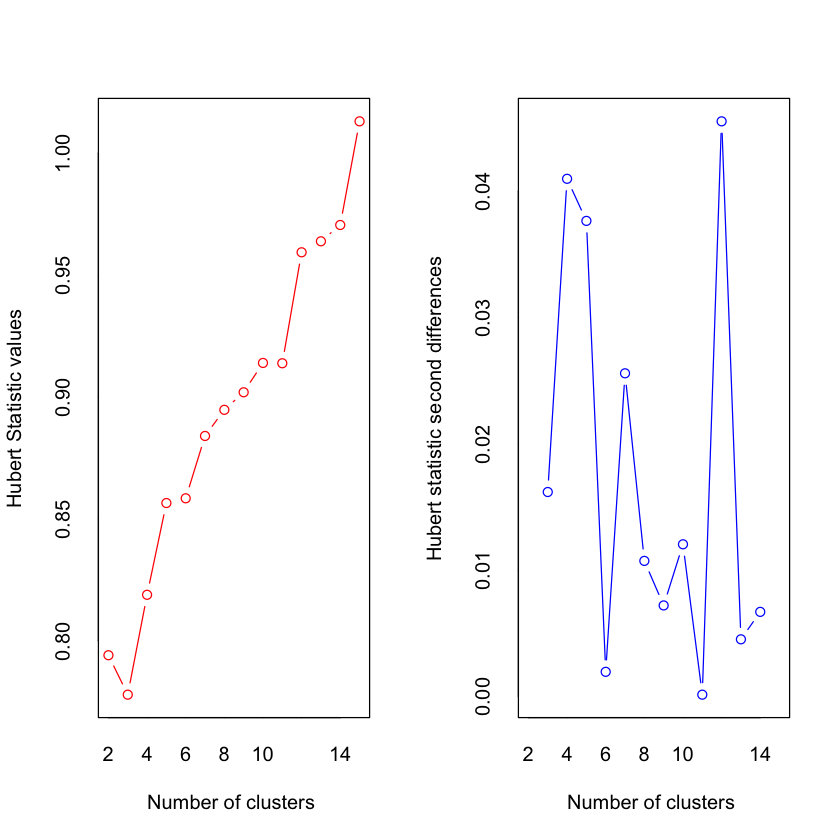

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 5 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of

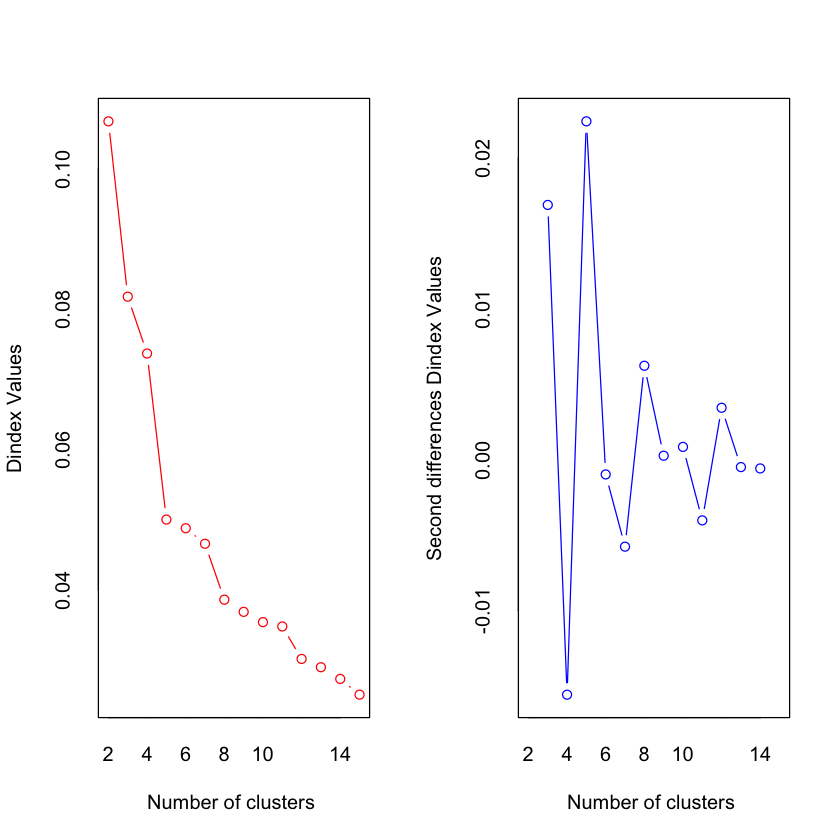

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


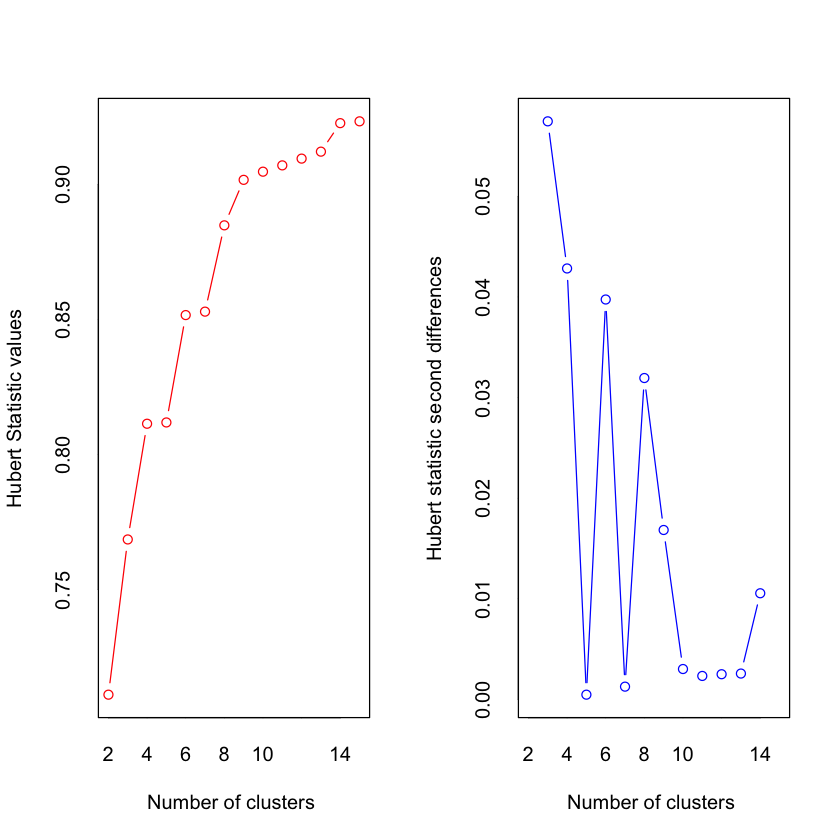

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 8 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 3 proposed 14 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 
[1] "

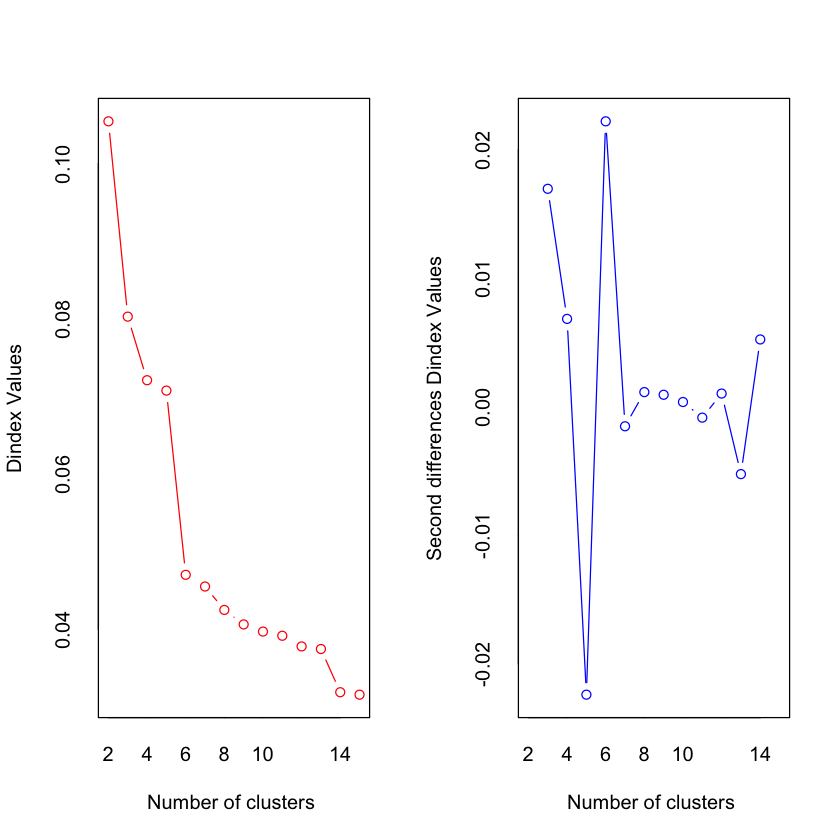

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


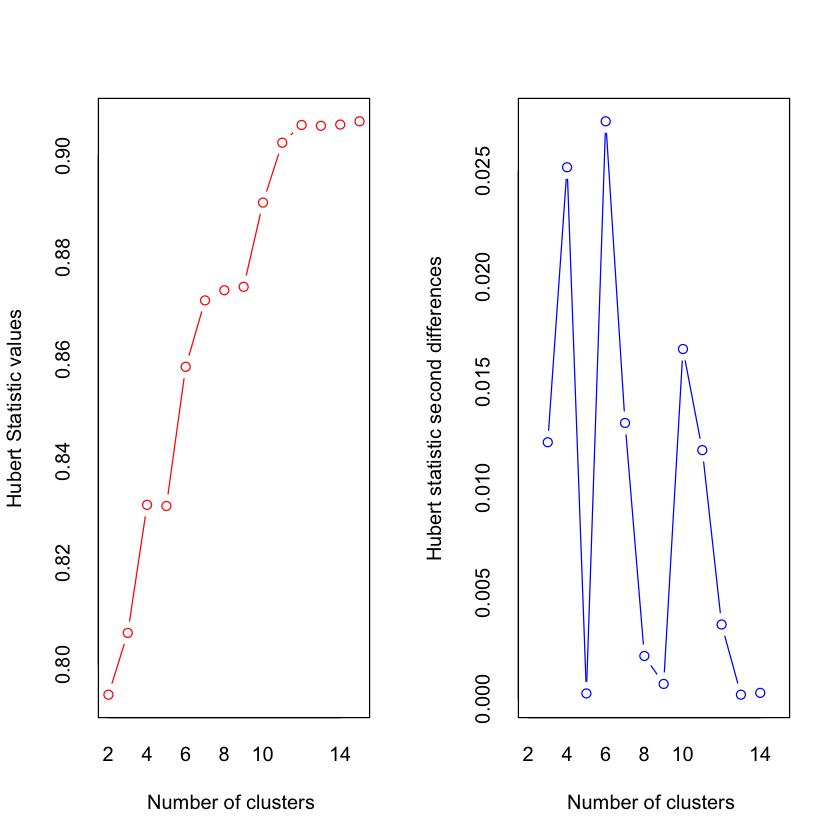

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 5 proposed 7 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
***************************

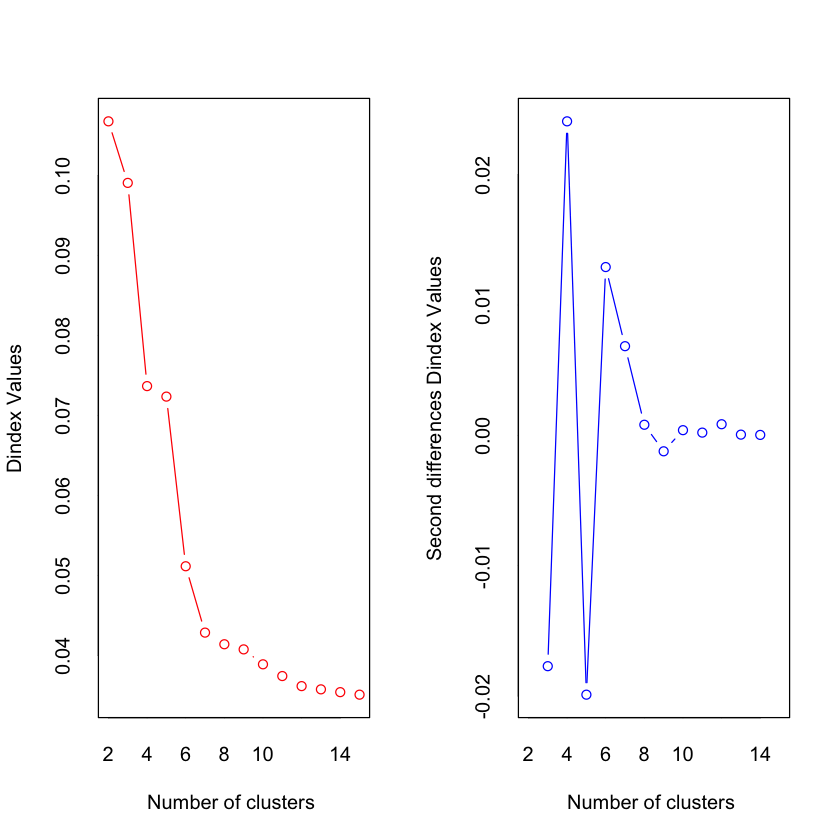

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


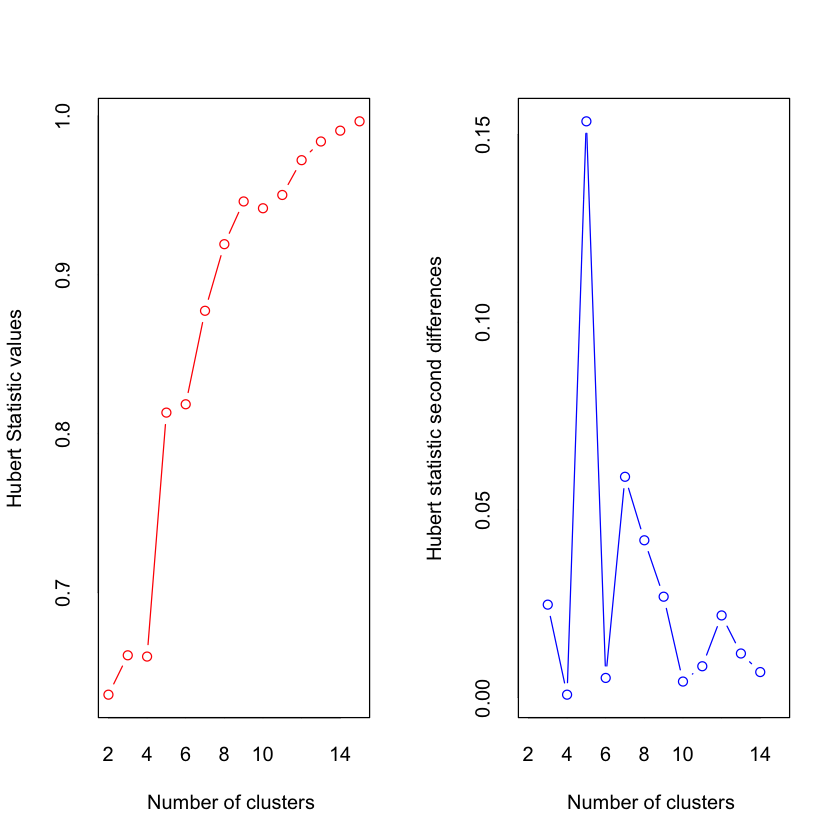

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 13 proposed 5 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 
[1] "end of method ======================="


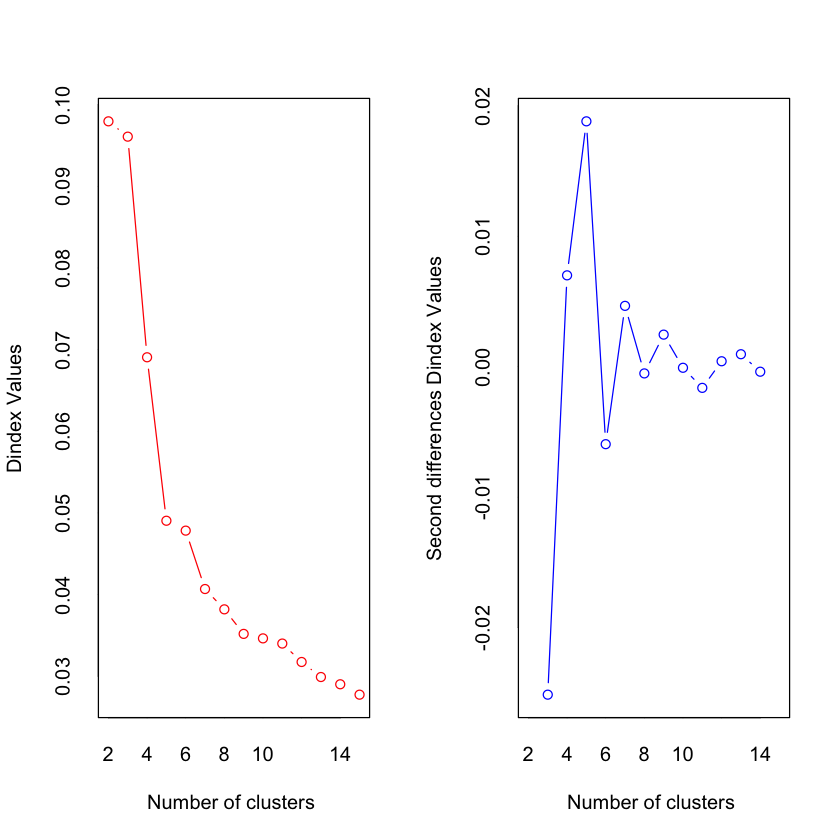

In [560]:
for(m in methods_nbclust){
    print(m)
    NbClust(data, method = m)
    print("end of method =======================")
}

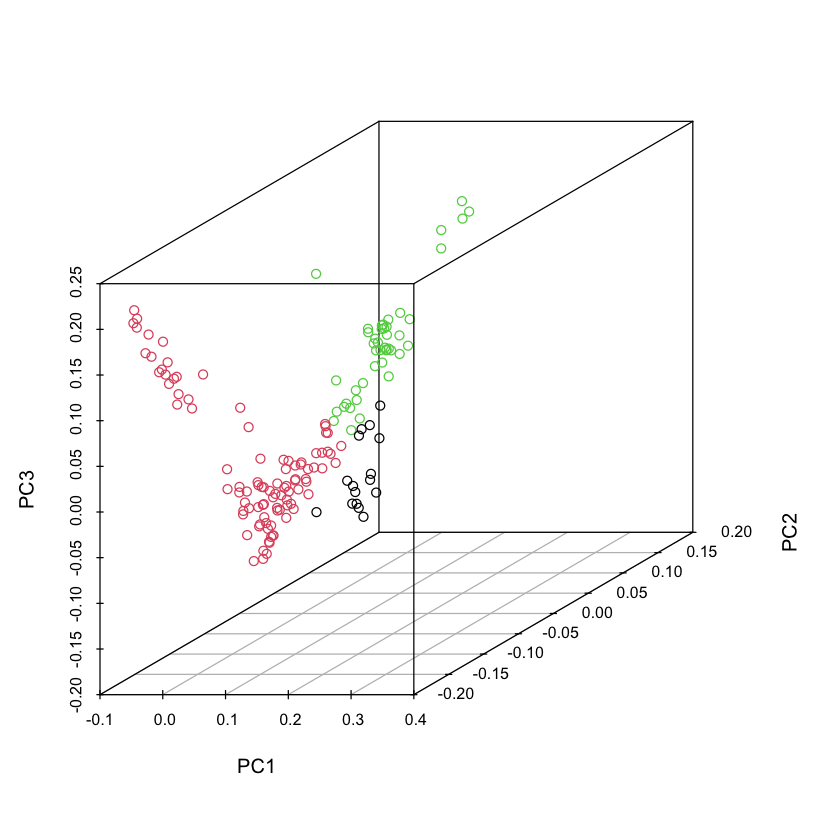

In [561]:
kmeans_result<-kmeans(data, centers = 3)

k_means_clusters <- data
k_means_clusters$cluster <- as.factor(kmeans_result$cluster)

scatterplot3d(k_means_clusters$PC1, k_means_clusters$PC2, k_means_clusters$PC3, color = k_means_clusters$cluster, xlab = "PC1", ylab = "PC2", zlab = "PC3")

##### Single

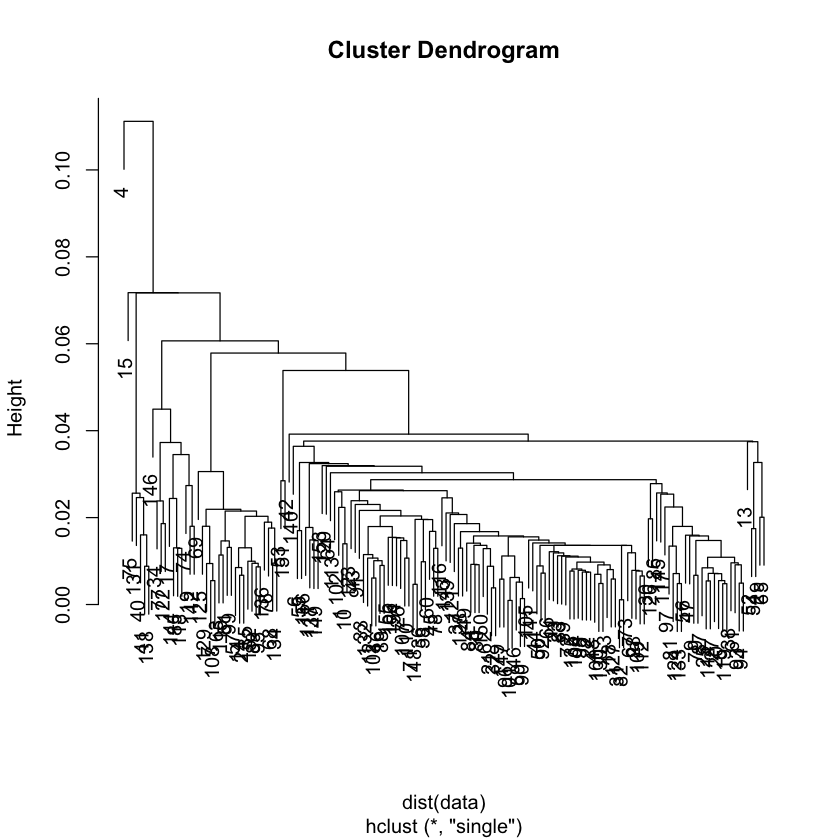

In [562]:
single <- hclust(dist(data), method="single")
plot(single)

##### Average

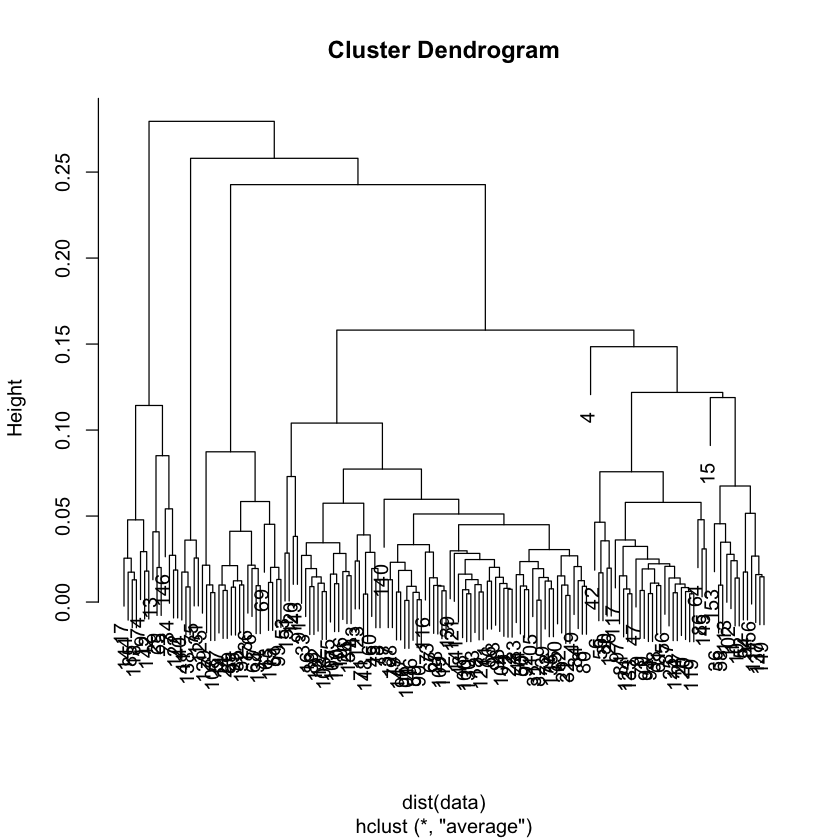

In [563]:
average <- hclust(dist(data), method="average")
plot(average)

Visualize the clusters based on the first three principal components using different colors for each cluster.

Hint:

You can use ggplot2's geom_point() function and set the aes(color=cluster_id) to color points based on their cluster assignment.

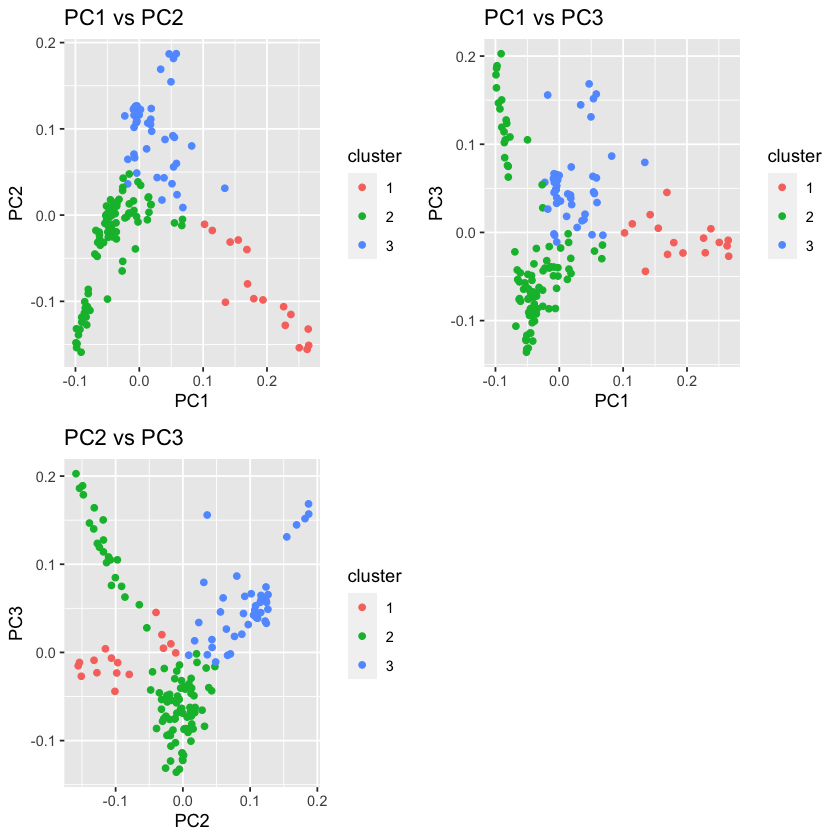

In [564]:
plot1 <- ggplot(k_means_clusters, aes(x = PC1, y = PC2, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")
plot2 <- ggplot(k_means_clusters, aes(x = PC1, y = PC3, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC3") + ggtitle("PC1 vs PC3")
plot3 <- ggplot(k_means_clusters, aes(x = PC2, y = PC3, color = cluster)) + geom_point() + labs(x = "PC2", y = "PC3") + ggtitle("PC2 vs PC3")

grid.arrange(plot1, plot2, plot3, ncol = 2)

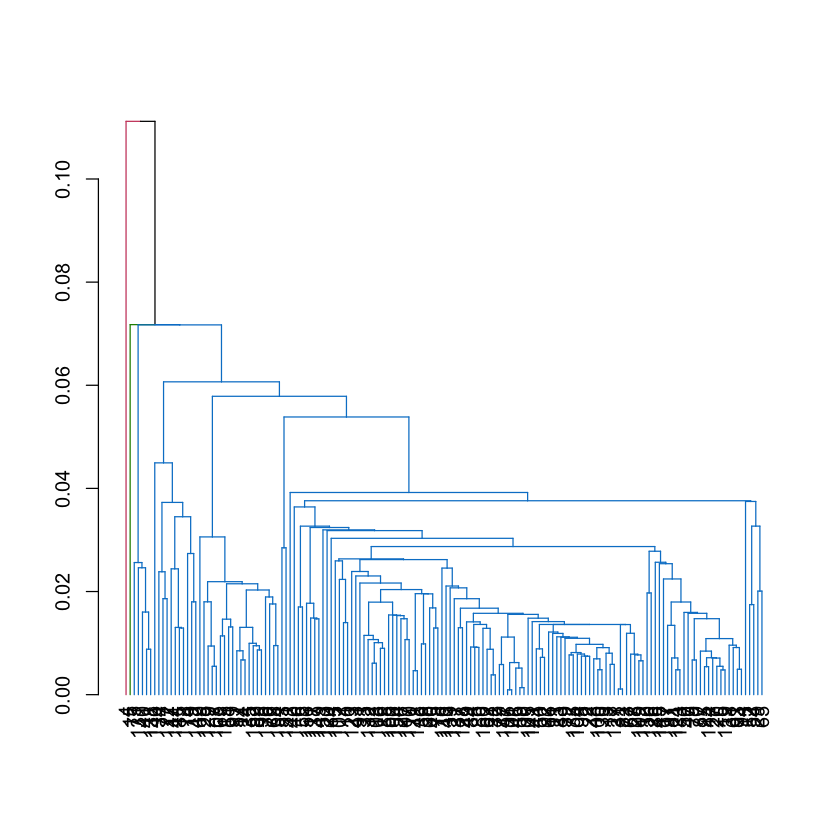

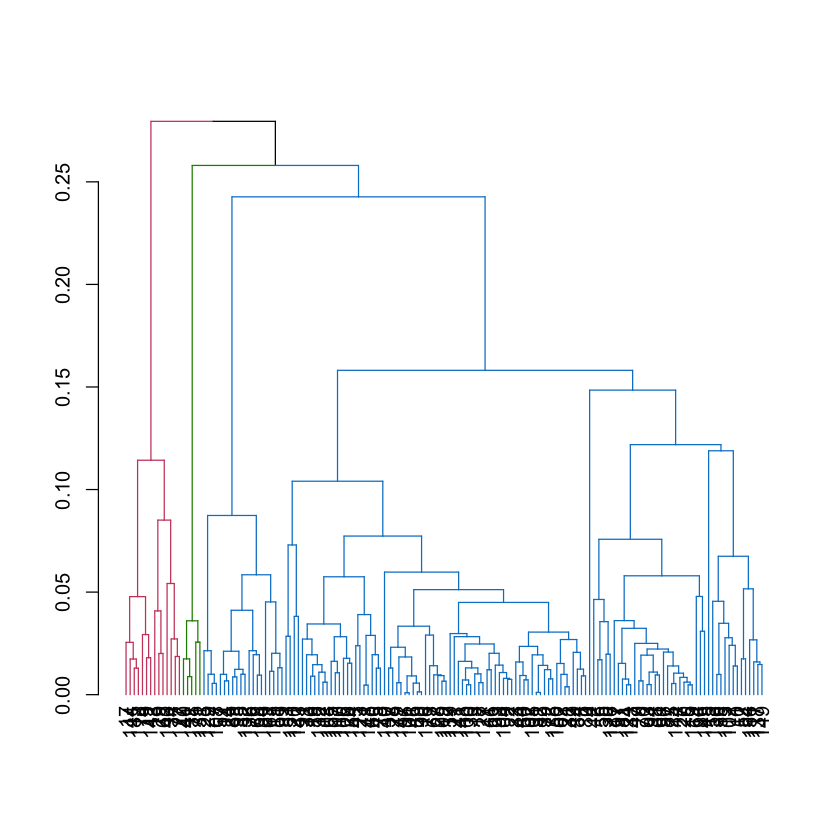

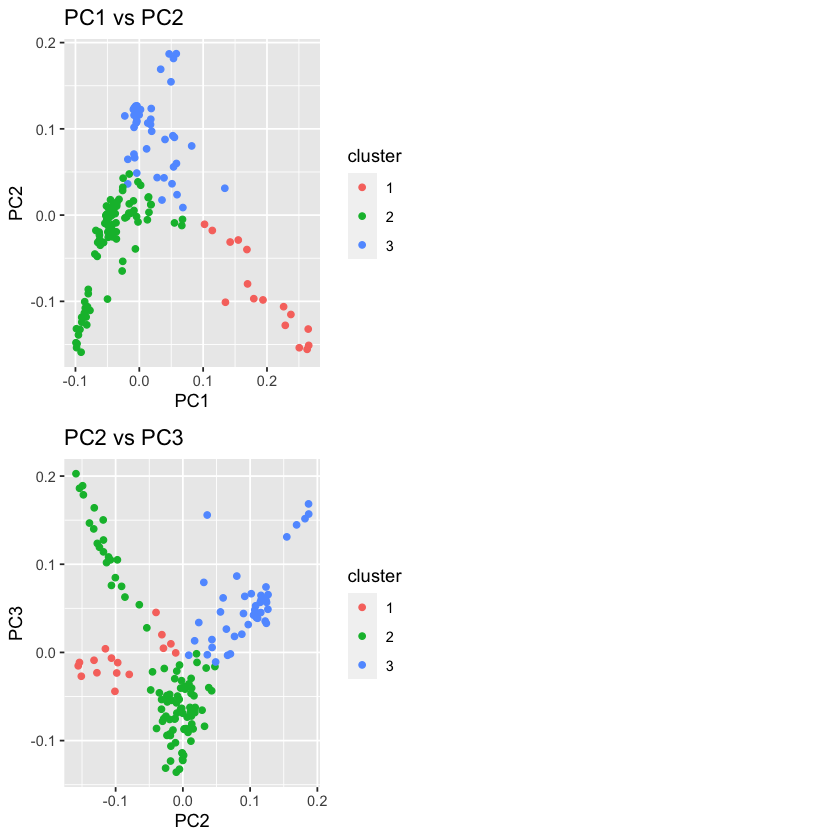

In [565]:
plot1 <- ggplot(k_means_clusters, aes(x = PC1, y = PC2, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")


dend <- as.dendrogram(single)
dend <- dend %>% color_branches(k = 3)
plot2 <-plot(dend)

dend <- as.dendrogram(average)
dend <- dend %>% color_branches(k = 3)
plot2 <-plot(dend)

grid.arrange(plot1, plot2, plot3, ncol = 2)

## Part 2: Regression Analysis

Engage in regression analysis to understand the influence of genetic variables on the observed clusters.

### Task 2.1: Identifying Significant SNPs

Identify and rank the most significant 10 SNPs by their correlation with the first 3 principal components.

Hints:
Coding Hints: Iterate over the list of SNPs using a for-loop, storing and ranking the correlation coefficients to identify the most significant ones.

1. Calculate Correlations Between SNPs and First 3 PCs
- Obtain the Proportion of Variance Explained: This information is usually part of the PCA output and is calculated as the variance explained by each PC divided by the total variance.
- Weight the Squared Correlations: Multiply the squared correlations by the corresponding variance explained by each PC.
- Sum the Weighted Squared Correlations: Sum these weighted values for each SNP to get a measure that accounts for both the strength of the correlation and the importance of the PCs.

Example in R:
Assuming pc_scores is a matrix with PLINK-derived PC scores for the first three components (columns) and samples (rows), and snp_matrix is a matrix with samples (rows) and SNPs (columns):

*Calculate correlations between each SNP and the first three PCs*

correlations <- matrix(nrow = ncol(snp_matrix), ncol = 3)
for (i in 1:ncol(snp_matrix)) {
for (j in 1:3) { # Only considering the first 3 PCs
correlations[i, j] <- cor(snp_matrix[, i], pc_scores[, j], use = "complete.obs") }
}

*Row names for correlations matrix (assuming SNP names are available)*

rownames(correlations) <- colnames(snp_matrix)


In [566]:
shell_call("./plink --bfile pruned_data --recode A --out snp_matrix")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snp_matrix.log.
Options in effect:
  --bfile pruned_data
  --out snp_matrix
  --recode A

8192 MB RAM detected; reserving 4096 MB for main workspace.
31694 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.998719.
31694 variants and 156 people pass filters and QC.
Note: No phenotypes present.
--recode A to snp_matrix.raw ... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575

In [567]:
pc_scores <- data.frame(PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4, PC3 = eigen_vecs$V5)
snps_matrix <- read.table("snp_matrix.raw", header = TRUE, sep = "")
snps_matrix <- snps_matrix[, -(1:6)]

correlations <- matrix(nrow = ncol(snps_matrix), ncol = 3)

In [568]:
for (i in 1:ncol(snps_matrix)) {
    for (j in 1:3) { # Only considering the first 3 PCs
        correlations[i, j] <- cor((snps_matrix[, i]), pc_scores[, j], use = "complete.obs") 
    }
}
rownames(correlations) <- colnames(snps_matrix)
correlations

rs7519837_T,0.486656827,0.117843780,0.0420485551
rs10907187_A,0.008823039,-0.047633290,0.0546126078
rs6603803_G,-0.296786227,0.049088267,0.0506498071
rs7513222_A,-0.029715407,0.273801998,-0.1278812531
rs12045693_A,0.136385815,0.169164058,0.0970725596
rs2840528_G,0.439716697,-0.083428765,-0.0889448125
rs7545940_C,-0.110006233,-0.002140551,0.2956230900
rs4648633_C,-0.275152522,-0.152391078,0.1290150644
rs3736330_T,-0.365048234,0.045487025,0.1170119250
rs12049543_A,-0.191553630,-0.126565735,-0.1909501401
rs2606414_T,0.274570449,0.202577290,0.0190250232


2. Identify the Most Influential SNPs
- To find the most influential SNPs for the first three PCs, you can take the values squared of the correlations multiplied by PC explained variance proportion (since both positive and negative correlations indicate influence) and then sum these values across the first three PCs for each SNP. The SNPs with the highest sums are the most influential.
Assuming pca_result contains your PCA results, and correlations is the matrix of correlations between SNPs and the first three PCs:

*Extract the proportion of variance explained by the first three PCs*

var_explained <- pca_result$sdev^2 / sum(pca_result$sdev^2) var_explained <- var_explained[1:3]

*Weight the squared correlations by the variance explained*

weighted_correlations <- sweep(correlations^2, 2, var_explained, "*")

*Sum the weighted squared correlations for each SNP*

sum_weighted_sq_correlations <- apply(weighted_correlations, 1, sum) # Sorting SNPs by their weighted influence and selecting the top ones top_snps <- sort(sum_weighted_sq_correlations, decreasing = TRUE)

*Displaying the most influential SNPs based on weighted squared correlations*
print(top_snps)

This will give you the names and corresponding influence scores of the top 10 SNPs that have the highest cumulative absolute correlation with the first three principal components.

In [569]:
eigen_vals <- read.table("pca_results.eigenval", header = FALSE)
var_explained <- eigen_vals / sum(eigen_vals)
var_explained <- var_explained[1:3,]

In [570]:
weighted_correlations <- sweep(correlations^2, 2, var_explained, "*")
sum_weighted_sq_correlations <- apply(weighted_correlations, 1, sum)
top_snps <- sort(sum_weighted_sq_correlations, decreasing = TRUE)
print(top_snps)

rs11148886_C   rs728244_A rs10272163_G rs10220140_C rs10279935_C  rs7517189_G 
6.354155e-02 5.773777e-02 5.564014e-02 4.908076e-02 4.784747e-02 4.767599e-02 
 rs4769711_G  rs4938639_G  rs6048084_A rs10490014_G rs10503671_G  rs6959663_G 
4.435325e-02 4.420145e-02 4.386600e-02 4.353717e-02 4.353377e-02 4.349551e-02 
 rs2207782_A  rs2255747_T  rs6945984_C rs10020331_T rs12925933_A  rs3787397_A 
4.314711e-02 4.305242e-02 4.291164e-02 4.266407e-02 4.229481e-02 4.217706e-02 
 rs1413299_T  rs7253024_T  rs5954038_C  rs8053877_T  rs4670713_C rs13313624_T 
4.216317e-02 4.209386e-02 4.206183e-02 4.125434e-02 4.090368e-02 4.080481e-02 
rs10479576_A  rs9369325_T   rs704962_C  rs6451268_G rs12255425_G   rs846604_A 
4.078269e-02 4.068562e-02 4.067976e-02 4.035688e-02 4.014207e-02 3.999889e-02 
  rs834347_T  rs9967367_T  rs1234805_T  rs7188849_T  rs9845811_A  rs2695872_T 
3.925307e-02 3.914063e-02 3.898085e-02 3.896710e-02 3.873898e-02 3.871412e-02 
  rs218021_T rs11125373_A  rs1966590_A  rs2373177_C 

In [571]:
top_10_snps <- top_snps[1:10]
print(top_10_snps)

rs11148886_C   rs728244_A rs10272163_G rs10220140_C rs10279935_C  rs7517189_G 
  0.06354155   0.05773777   0.05564014   0.04908076   0.04784747   0.04767599 
 rs4769711_G  rs4938639_G  rs6048084_A rs10490014_G 
  0.04435325   0.04420145   0.04386600   0.04353717 


Notes:

- Missing Data Handling: The cor function in R needs handling of missing data (na.rm = TRUE or use = "complete.obs"), especially if your SNP dataset has missing values.
- Correlation Significance: While this method identifies SNPs with the strongest correlations, it does not necessarily imply causation or functional significance. Further biological validation and analysis would be needed.

_Note this is a similar way to having the PC Vs SNP weight matrix directly , we calculate importance using the actual weights of the PC Vs SNP matrix_

### Task 2.2: Linear Regression Analysis

Conduct linear regression analysis for each of the top 10 SNPs identified, with the model specified as:

_Note that you need to convert SNPi to additive model then normalize data details are discussed in coding hints_

- SNPi∼PC1+PC2+PC3
for i in the range from 1 to 10.

Also calculate
- PCj ~SNP1+SNP2+SNP3+SNP4+SNP5+SNP6+SNP7+SNP8+SNP9+SNP10 for j in the range from 1 to 3.

_Assess the contribution of each principal component to the variation in SNP values._

Hints:
Command: lm(SNP ~ PC1 + PC2 + PC3, data = dataset)
Coding Hints:
1. Use Plink to recode your data to the 0, 1, 2 format with the --recode A option
plink --bfile data --recode A --out recoded_data
1. Assuming you have the .raw file from Plink with the 0, 1, 2 coding, read the file into R.
genotype_data <- read.table("plink.raw", header = TRUE, sep = "")
1. Isolate the columns that contain the SNP data, which usually follows the first six columns (FID, IID, PAT, MAT, SEX, and PHENOTYPE).
snp_data <- genotype_data[, -(1:6)] # Adjust the index to exclude non-SNP
columns
1. Apply the standardization: (x - mean(x)) / sd(x) for each SNP.
standardized_snps <- as.data.frame(scale(snp_data))
After this step, the standardized_snps dataframe contains the standardized SNP data,
where each SNP has a mean of 0 and a standard deviation of 1.
1. Create a loop to run linear regressions for each of the top 10 SNPs. Store the summary
of each regression in a list for subsequent analysis and comparison.

In [572]:
shell_call("./plink --noweb --bfile pruned_data --recode A --out recorded_data")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to recorded_data.log.
Options in effect:
  --bfile pruned_data
  --noweb
  --out recorded_data
  --recode A

Note: --noweb has no effect since no web check is implemented yet.
8192 MB RAM detected; reserving 4096 MB for main workspace.
31694 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.998719.
31694 variants and 156 people pass filters and QC.
Note: No phenotypes present.
--recode A to recorded_data.raw ... 10111213141

In [573]:
genotype_data <- read.table("recorded_data.raw", header = TRUE, sep = "")
snp_data <- genotype_data[, -(1:6)]
standardized_snps <- as.data.frame(scale(snp_data))
standardized_top_10_snps <- standardized_snps[, names(top_10_snps)]

In [574]:
model_data <- cbind(standardized_top_10_snps, PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4, PC3 = eigen_vecs$V5)

In [575]:
regression_snps <- list()
for (snp in names(top_10_snps)) {
    formula <- as.formula(paste(snp, "~ PC1 + PC2 + PC3"))
    regression_model <- lm(formula , data = model_data)
    regression_snps[[snp]] <- regression_model
}
regression_snps

$rs11148886_C

Call:
lm(formula = formula, data = model_data)

Coefficients:
(Intercept)          PC1          PC2          PC3  
  4.604e-05    7.686e+00   -3.115e+00   -4.949e-01  


$rs728244_A

Call:
lm(formula = formula, data = model_data)

Coefficients:
(Intercept)          PC1          PC2          PC3  
  4.869e-05    7.568e+00   -1.108e+00    1.345e+00  


$rs10272163_G

Call:
lm(formula = formula, data = model_data)

Coefficients:
(Intercept)          PC1          PC2          PC3  
  4.499e-05    7.329e+00   -2.242e+00    3.378e-01  


$rs10220140_C

Call:
lm(formula = formula, data = model_data)

Coefficients:
(Intercept)          PC1          PC2          PC3  
  4.184e-05    6.872e+00   -2.150e+00    4.771e-01  


$rs10279935_C

Call:
lm(formula = formula, data = model_data)

Coefficients:
(Intercept)          PC1          PC2          PC3  
  -0.001005     6.941323     0.570155     0.140686  


$rs7517189_G

Call:
lm(formula = formula, data = model_data)

Coefficients:
(

In [576]:
regression_pcas <- list()
for (j in 1:3) {
    pc <- sprintf("PC%d", j) 
    formula <- as.formula(paste(pc, "~", paste(names(top_10_snps), collapse = " + ")))
    pc_regression_model <- lm(formula, data = model_data)
    regression_pcas[[pc]] <- pc_regression_model
}
regression_pcas

$PC1

Call:
lm(formula = formula, data = model_data)

Coefficients:
 (Intercept)  rs11148886_C    rs728244_A  rs10272163_G  rs10220140_C  
  -7.893e-05     1.533e-02     1.776e-02     9.405e-03     8.378e-03  
rs10279935_C   rs7517189_G   rs4769711_G   rs4938639_G   rs6048084_A  
   1.234e-02     1.166e-02     1.413e-02     1.132e-02     6.283e-03  
rs10490014_G  
   1.133e-02  


$PC2

Call:
lm(formula = formula, data = model_data)

Coefficients:
 (Intercept)  rs11148886_C    rs728244_A  rs10272163_G  rs10220140_C  
   0.0001661    -0.0227846    -0.0025010    -0.0066157    -0.0151267  
rs10279935_C   rs7517189_G   rs4769711_G   rs4938639_G   rs6048084_A  
   0.0085211     0.0195581     0.0125199    -0.0116396     0.0027533  
rs10490014_G  
   0.0048514  


$PC3

Call:
lm(formula = formula, data = model_data)

Coefficients:
 (Intercept)  rs11148886_C    rs728244_A  rs10272163_G  rs10220140_C  
   0.0008602    -0.0091970     0.0103591     0.0021873     0.0003825  
rs10279935_C   rs75171

### Task 2.3: Validation of Regression Equations 

Validate the linear regression models by comparing the SNP weights against those obtained from the PCs vs SNPs Calculated correlation matrix
- Consider constructing correlation like matrix using weights of all regression models 
- Analyze and compare the consistency (regarding positive correlation and negative correlation) of SNP weights against those from the PC SNP Correlation matrix
- Do you find the difference in sign of weights, and do weights differs explain why or why not in both cases?

Hints:.Coding Hints: Use matrix operations in R to extract and compare the coefficients. Consider visualizing differences in a plot for a clearer comparison.


In [577]:
coefficients_regression_snps <- list()
for (i in seq_along(regression_snps)) {
    coefficients_regression_snps[[i]] <- regression_snps[[i]]$coefficients
}

coefficients_regression_pcas <- list()
for(i in seq_along(regression_pcas)) {
    coefficients_regression_pcas[[i]] <- regression_pcas[[i]]$coefficients
}
top_10_correlent_snps <- correlations[rownames(correlations) %in% names(top_10_snps),]

In [578]:
coeff_matrix_snps <- matrix(nrow = 10, ncol = 3)
for (i in 1:10) {
    for (j in 1:3) {
        coeff_matrix_snps[i, j] <- coefficients_regression_snps[[i]][j+1]
    }
}
coeff_matrix_pcas <- matrix(nrow = 10, ncol = 3)
for (i in 1:3) {
    for (j in 1:10) {
        coeff_matrix_pcas[j, i] <- coefficients_regression_pcas[[i]][j+1]
    }
}
rownames(coeff_matrix_snps) <- names(top_10_snps)
rownames(coeff_matrix_pcas) <-names(top_10_snps)
top_10_correlent_snps <- top_10_correlent_snps[match(names(top_10_snps), rownames(top_10_correlent_snps)),]

In [579]:
coeff_matrix_snps
coeff_matrix_pcas
top_10_correlent_snps

rs11148886_C,7.686483,-3.11521319,-0.49486841
rs728244_A,7.568172,-1.10825197,1.34491586
rs10272163_G,7.329370,-2.24239826,0.33784882
rs10220140_C,6.872438,-2.14953512,0.47711826
rs10279935_C,6.941323,0.57015459,0.14068564
rs7517189_G,6.829261,1.40861477,1.32943832
rs4769711_G,6.621268,1.37045257,0.03893630
rs4938639_G,6.441975,-2.45584127,-0.42201851
rs6048084_A,6.657250,-0.50597177,-0.04417903
rs10490014_G,6.653014,0.01911661,0.17019550


rs11148886_C,0.015332251,-0.022784623,-0.0091970182
rs728244_A,0.017763272,-0.002500982,0.0103590530
rs10272163_G,0.009405248,-0.006615700,0.0021873486
rs10220140_C,0.008377647,-0.015126704,0.0003825357
rs10279935_C,0.012340336,0.008521101,-0.0007347015
rs7517189_G,0.011660791,0.019558082,0.0095134568
rs4769711_G,0.014125650,0.012519893,-0.0013632477
rs4938639_G,0.011315768,-0.011639552,-0.0037239893
rs6048084_A,0.006282539,0.002753320,-0.0033826257
rs10490014_G,0.011328252,0.004851425,0.0008695212


rs11148886_C,0.6173932,-0.25021987,-0.039748675
rs728244_A,0.6078902,-0.08901686,0.108026342
rs10272163_G,0.5887091,-0.18011369,0.027136775
rs10220140_C,0.5520075,-0.17265475,0.038323162
rs10279935_C,0.5591916,0.04590138,0.010808782
rs7517189_G,0.5485395,0.11314279,0.106783102
rs4769711_G,0.5331208,0.11003366,0.001129885
rs4938639_G,0.5174319,-0.19725785,-0.033897252
rs6048084_A,0.5356113,-0.04050025,-0.002922068
rs10490014_G,0.5343830,0.00153560,0.013670487


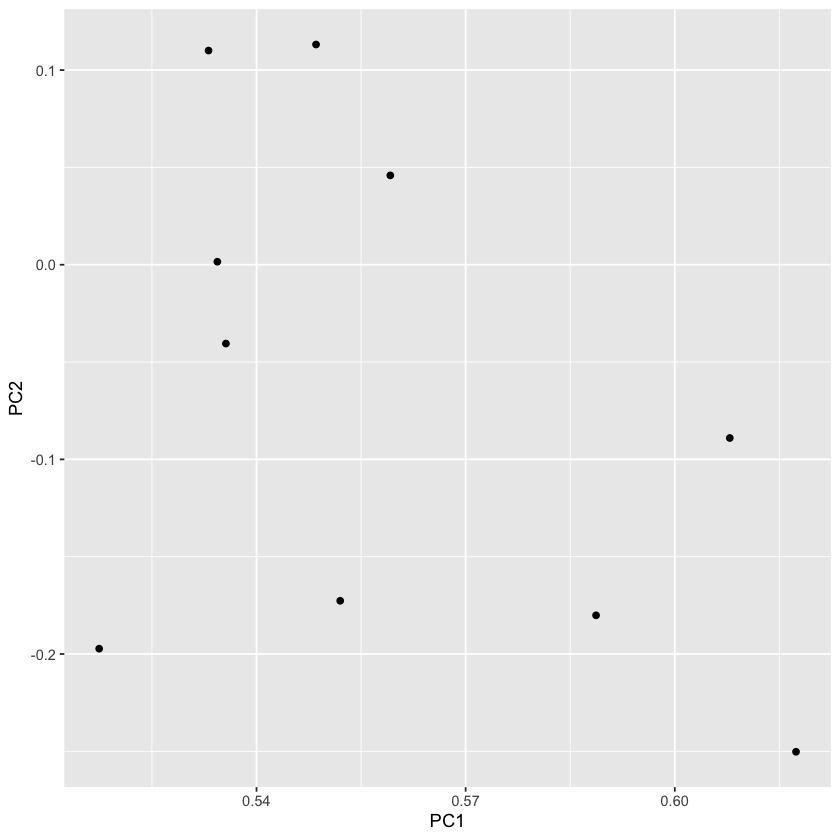

In [580]:
ggplot(data.frame(top_10_correlent_snps), aes(x = X1, y = X2)) + geom_point() + labs(x = "PC1", y = "PC2")

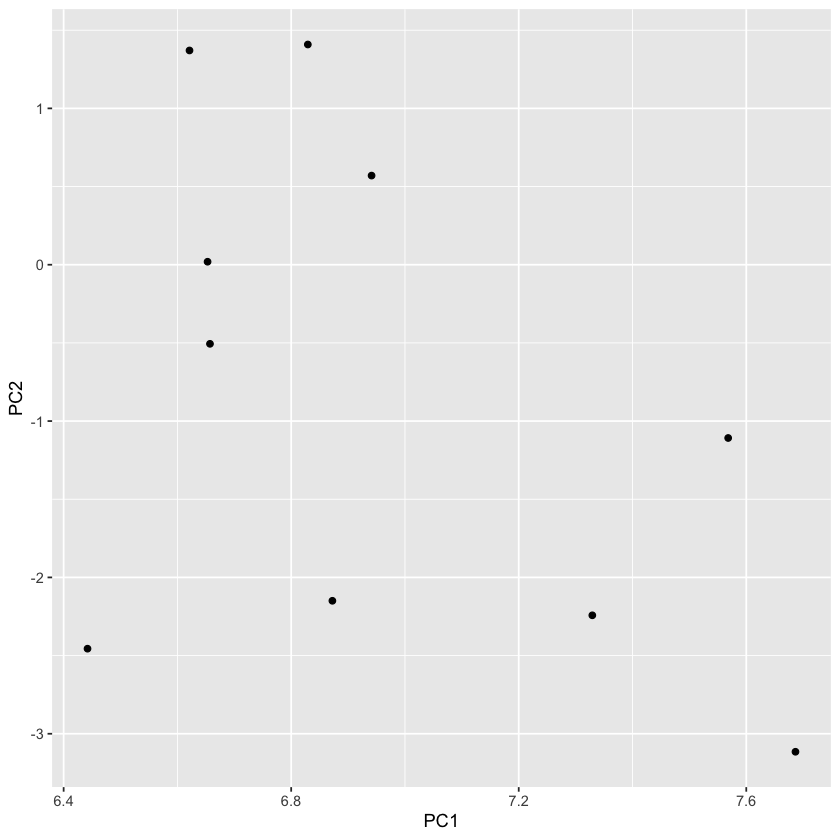

In [581]:
ggplot(data.frame(coeff_matrix_snps), aes(x = X1, y = X2)) + geom_point() + labs(x = "PC1", y = "PC2")

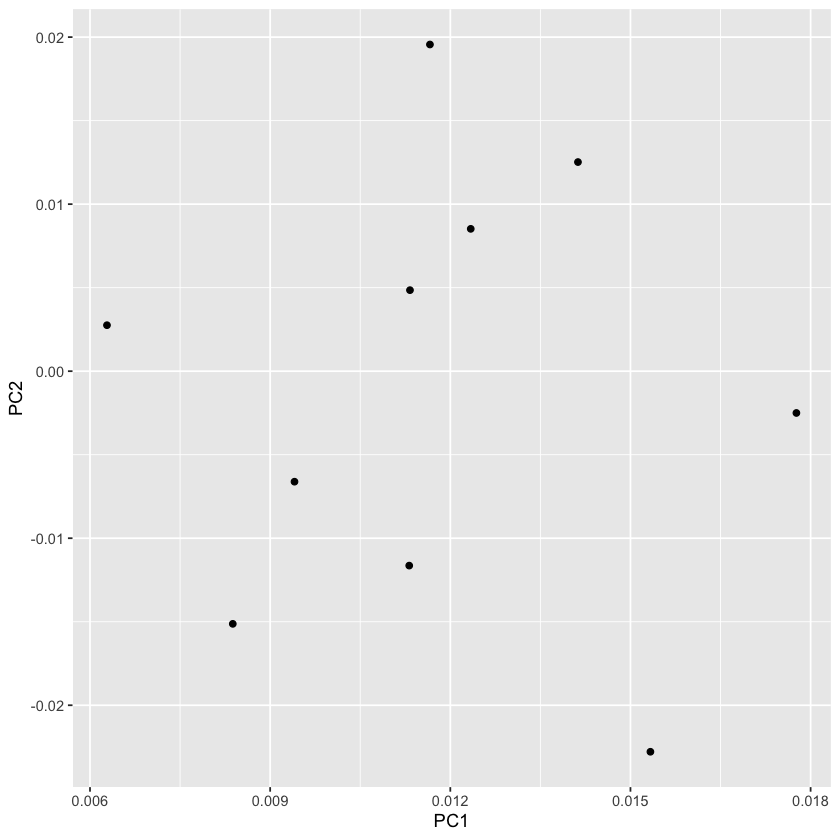

In [582]:
ggplot(data.frame(coeff_matrix_pcas), aes(x = X1, y = X2)) + geom_point() + labs(x = "PC1", y = "PC2")

In [583]:
correlations_snps <- top_10_correlent_snps - coeff_matrix_snps
correlations_pcas <- top_10_correlent_snps - coeff_matrix_pcas

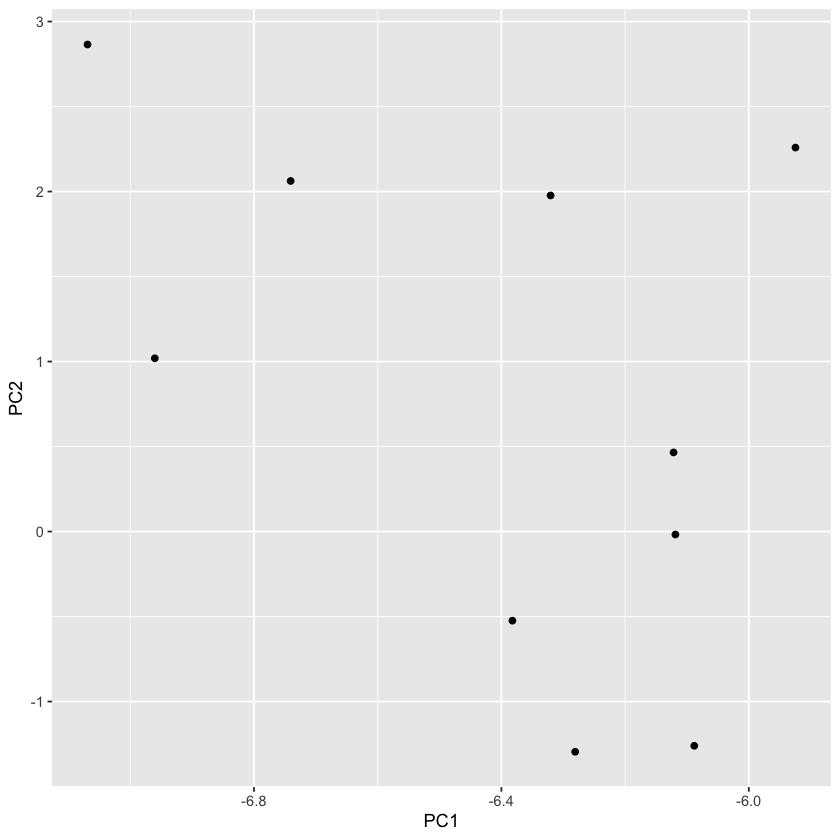

In [584]:
ggplot(data.frame(correlations_snps), aes(x = X1, y = X2)) + geom_point() + labs(x = "PC1", y = "PC2")

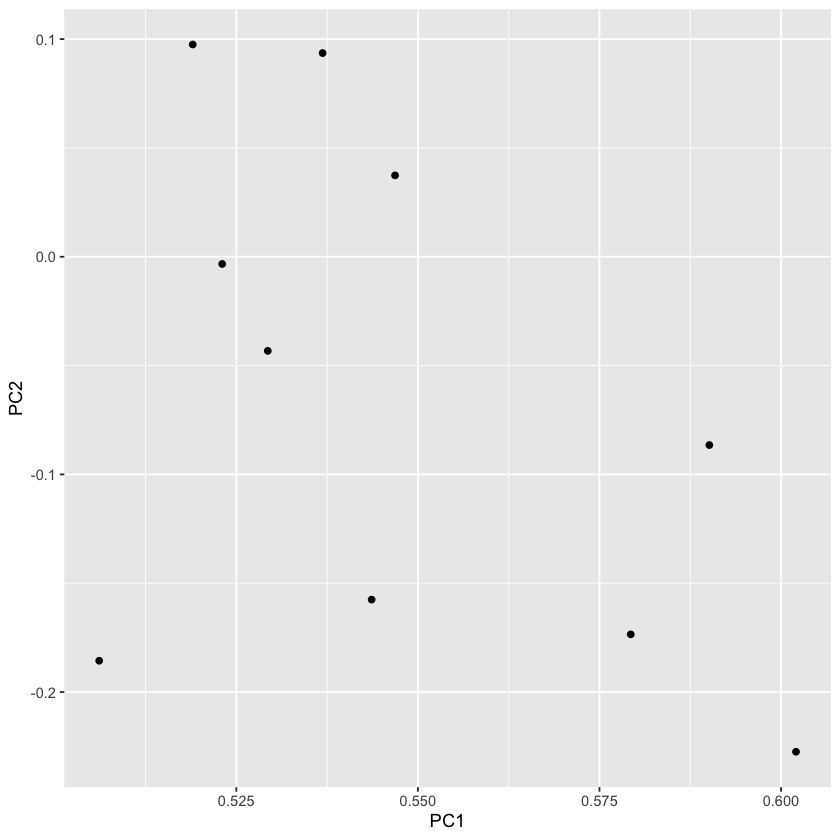

In [585]:
ggplot(data.frame(correlations_pcas), aes(x = X1, y = X2)) + geom_point() + labs(x = "PC1", y = "PC2")

### Task 2.4: Logistic Regression Analysis for Cluster Membership

**Implement logistic regression models to predict cluster membership based on PCA components:**

Note that for this part for each cluster in the three clusters, it is required to obtain 3 regression models, for example, first regression model output is representing if data is in cluster 1 or in other clusters

cluster∼PC1+PC2+PC3
Estimate logistic regression equation with the significant SNPs as predictors for cluster membership, note that SNPs are in same normalized form as in task 2.2 cluster∼SNP1+SNP2+...+SNP10 → you don’t need to do regression again here, think how given above regression model to estimate regression model of cluster given first 10 SNPs
Evaluate which set of predictors (PCA components or SNPs) provides the best cluster distinction.

Hints:
Command for PCA components: glm(cluster ~ PC1 + PC2 + PC3, family = binomial, data = dataset)
Coding Hints: use the glm() function specifying the binomial family. Evaluate the model summaries for the significance of each predictor.

In [586]:
snps_matrix$PC1 <- pc_scores$PC1
snps_matrix$PC2 <- pc_scores$PC2
snps_matrix$PC3 <- pc_scores$PC3
snps_matrix$clusters <- k_means_clusters$cluster
cluster_assignments <- k_means_clusters$cluster
snps_matrix$cluster_1 <- as.integer(cluster_assignments == 1)
snps_matrix$cluster_2 <- as.integer(cluster_assignments == 2)
snps_matrix$cluster_3 <- as.integer(cluster_assignments == 3)

In [587]:
logistic_regression_pcas <- list()
for(i in c(1,2,3)) {
    cluster <- sprintf("cluster_%d", i) 
    formula <- as.formula(paste(cluster, "~ PC1 + PC2 + PC3"))
    pc_regression_model <- glm(formula, data = snps_matrix, family = binomial)
    logistic_regression_pcas[[cluster]] <- pc_regression_model
}
logistic_regression_pcas

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


$cluster_1

Call:  glm(formula = formula, family = binomial, data = snps_matrix)

Coefficients:
(Intercept)          PC1          PC2          PC3  
     -126.4       1255.9      -1579.0       -162.9  

Degrees of Freedom: 155 Total (i.e. Null);  152 Residual
Null Deviance:	    103.2 
Residual Deviance: 3.037e-08 	AIC: 8

$cluster_2

Call:  glm(formula = formula, family = binomial, data = snps_matrix)

Coefficients:
(Intercept)          PC1          PC2          PC3  
      3.133      -91.421      -70.445      -81.654  

Degrees of Freedom: 155 Total (i.e. Null);  152 Residual
Null Deviance:	    207.9 
Residual Deviance: 15.8 	AIC: 23.8

$cluster_3

Call:  glm(formula = formula, family = binomial, data = snps_matrix)

Coefficients:
(Intercept)          PC1          PC2          PC3  
     -10.61       101.98       306.66       113.95  

Degrees of Freedom: 155 Total (i.e. Null);  152 Residual
Null Deviance:	    185.6 
Residual Deviance: 8.54 	AIC: 16.54


In [588]:
logistic_regression_snps <- list()
for(i in c(1,2,3)) {
    cluster <- sprintf("cluster_%d", i) 
    formula <- as.formula(paste(cluster, "~" , paste(names(top_10_snps), collapse = " + ")))
    pc_regression_model <- glm(formula, data = snps_matrix, family = binomial)
    logistic_regression_snps[[cluster]] <- pc_regression_model
}
logistic_regression_snps

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


$cluster_1

Call:  glm(formula = formula, family = binomial, data = snps_matrix)

Coefficients:
 (Intercept)  rs11148886_C    rs728244_A  rs10272163_G  rs10220140_C  
     -574.39        177.05        105.35         41.77        125.62  
rs10279935_C   rs7517189_G   rs4769711_G   rs4938639_G   rs6048084_A  
       30.16        -28.58         57.14        107.41        -68.13  
rs10490014_G  
      -22.76  

Degrees of Freedom: 152 Total (i.e. Null);  142 Residual
  (3 observations deleted due to missingness)
Null Deviance:	    102.5 
Residual Deviance: 8.169e-08 	AIC: 22

$cluster_2

Call:  glm(formula = formula, family = binomial, data = snps_matrix)

Coefficients:
 (Intercept)  rs11148886_C    rs728244_A  rs10272163_G  rs10220140_C  
     3.55863      -0.47450      -1.44817      -0.07599       0.10011  
rs10279935_C   rs7517189_G   rs4769711_G   rs4938639_G   rs6048084_A  
    -0.92003      -0.91418      -0.90449      -0.33936      -0.32559  
rs10490014_G  
    -0.34849  

Degrees of

### Task 2.5: Multiclass Regression Analysis

Carry out a multiclass logistic regression to assign data points to clusters based on PCA component scores.
Hints:
Command: multinom(cluster ~ PC1 + PC2 + PC3 ,data = dataset)
Coding Hints: Use the multinom() function from the nnet package for multiclass logistic regression. Interpret the coefficients to determine influential predictors.

In [589]:
formula <- as.formula("clusters ~ PC1 + PC2 + PC3")
multi_regression <- multinom(formula, data = snps_matrix)
multi_regression

# weights:  15 (8 variable)
initial  value 171.383517 
iter  10 value 9.081880
iter  20 value 0.494657
iter  30 value 0.372210
iter  40 value 0.306579
iter  50 value 0.258873
iter  60 value 0.242891
iter  70 value 0.232041
iter  80 value 0.223949
iter  90 value 0.213307
iter 100 value 0.202104
final  value 0.202104 
stopped after 100 iterations


Call:
multinom(formula = formula, data = snps_matrix)

Coefficients:
  (Intercept)        PC1       PC2       PC3
2   26.311340 -373.96115 -126.0006 -167.8487
3    8.669441  -93.07827  392.5753  181.5398

Residual Deviance: 0.4042071 
AIC: 16.40421 

### Task 2.6: Multiclass vs. Binary Regression Classification Comparison

Provide what points have different classifications using this multi-class regression model vs using 3 binary regression model outputs, and in case there are differences could you provide insights about the reason?
Hints: Compare the classification outcomes from the multiclass model with those from the binary regression models.
Coding Hints: Use the predict() function to generate probabilities and classifications for each model. Create a confusion matrix to compare the predictions and highlight discrepancies.


In [590]:
multi_result<-predict(multi_regression, snps_matrix)
result_pca1 <-predict(logistic_regression_pcas$cluster_1, snps_matrix)> 0
result_pca2 <-predict(logistic_regression_pcas$cluster_2, snps_matrix)> 0
result_pca3 <-predict(logistic_regression_pcas$cluster_3, snps_matrix)> 0
result_snp1 <-predict(logistic_regression_snps$cluster_1, snps_matrix) > 0
result_snp2 <- predict(logistic_regression_snps$cluster_2, snps_matrix) > 0
result_snp3 <-predict(logistic_regression_snps$cluster_3, snps_matrix) > 0

In [591]:
result_snp1[is.na(result_snp1)] <- FALSE
result_snp2[is.na(result_snp2)] <- FALSE
result_snp3[is.na(result_snp3)] <- FALSE

In [592]:
table(result_snp1)
table(result_snp2)
table(result_snp3)
table(result_pca1)
table(result_pca2)
table(result_pca3)

result_snp1
FALSE  TRUE 
  140    16 

result_snp2
FALSE  TRUE 
   57    99 

result_snp3
FALSE  TRUE 
  132    24 

result_pca1
FALSE  TRUE 
  140    16 

result_pca2
FALSE  TRUE 
   59    97 

result_pca3
FALSE  TRUE 
  113    43 

In [593]:
confusion_matrix_pca <- matrix(0, nrow = 3, ncol = 3)
rownames(confusion_matrix_pca) <- c("multicluster_1", "multicluster_2", "mutlicluster_3")
colnames(confusion_matrix_pca) <- c("cluster_1", "cluster_2", "cluster_3")
confusion_matrix_snp <- matrix(0, nrow = 3, ncol = 3)
rownames(confusion_matrix_snp) <- c("multicluster_1", "multicluster_2", "mutlicluster_3")
colnames(confusion_matrix_snp) <- c("cluster_1", "cluster_2", "cluster_3")

In [594]:
for(i in seq(multi_result)){
    if(result_pca1[i]){
        confusion_matrix_pca[multi_result[i],1] <- confusion_matrix_pca[multi_result[i],1] + 1
    }
    if(result_pca2[i]){
        confusion_matrix_pca[multi_result[i],2] <- confusion_matrix_pca[multi_result[i],2] + 1
    }
    if(result_pca3[i]){
        confusion_matrix_pca[multi_result[i],3] <- confusion_matrix_pca[multi_result[i],3] + 1
    }
}
confusion_matrix_pca

,cluster_1,cluster_2,cluster_3
multicluster_1,16,1,0
multicluster_2,0,95,1
mutlicluster_3,0,1,42


In [595]:
for(i in seq(multi_result)){
    if(result_snp1[i]){
        confusion_matrix_snp[multi_result[i],1] <- confusion_matrix_snp[multi_result[i],1] + 1
    }
    if(result_snp2[i]){
        confusion_matrix_snp[multi_result[i],2] <- confusion_matrix_snp[multi_result[i],2] + 1
    }
    if(result_snp3[i]){
        confusion_matrix_snp[multi_result[i],3] <- confusion_matrix_snp[multi_result[i],3] + 1
    }
}
confusion_matrix_snp

,cluster_1,cluster_2,cluster_3
multicluster_1,16,0,2
multicluster_2,0,81,7
mutlicluster_3,0,18,15


In [596]:
table(multi_result)

multi_result
 1  2  3 
16 96 44 